In [11]:
"""
This program generates graphs showing continuous growth. 
"""
import simpy
import matplotlib.pyplot as plt
import numpy as np
# import aux

In [12]:
import mercury as mr

In [13]:
app = mr.App(title="Continuous Growth!", description="Slider demo", show_code=False)

mercury.App

In [14]:
"""
Plot graphs with more readable xlims and ylims.
Parameters:
    time_x(list(ints)): The x values for the graph.
    gaussian_y(list(floats)): The y values for the graph.
"""
def lim_plots(time_x, gaussian_y):
    fig, ax = plt.subplots(figsize=(12, 6))
    x = time_x
    y = gaussian_y
    ax.plot(y)
    #the x axis should show 0 through time
    plt.xlim([0, len(time_x)-1])
    #the y axis shows twice the highest y value
    plt.ylim([0, max(gaussian_y) * 2])
    plt.xlabel("Time")
    plt.ylabel("Requests")
    plt.show()
    


In [15]:
"""
Parameters:
    mean(int): The mean of the distribution.
    sd(int): The standard deviation of the distribution.
    time(int): The number of points to generate.
    new_dist(list(lists)): The new distribution to follow. Should be in this form.
    [[end1,freq1], [end2,freq2]...] The first entry in the list should be the percentage of the graph this section of the distribution will go up to, and the second should be the probability that any random point generated with this distribution falls within that sections of the graph. For example, a distribution of [[0.5, 0.9], [1, 0.1]] will have 90% of points fall within the first half of the graph and 10% of points fall within the second half.  
Returns: 
    requests_y(list(floats)): a series of randomly generated numbers along said distribution.
"""
def unique_norm(middle, sd, time, custom_dist):
    #based off of the usual range of standard deviations: approximate, however.
    start = middle - sd * 4
    end = middle + sd * 4
    requests_y = []
    #for each point
    for i in range(time):
        rand_num = np.random.random()
        #the total number that rand_num must be below in order to fall into a certain probability block
        freq_sum = 0
        #for each of the distribution's blocks of probability
        for freq in range(len(custom_dist)):
            #ensures upper bound of probability is always increased
            #that way all points will eventually be added (because sum of all 
            freq_sum += custom_dist[freq][1]
            #if the random number is less than that sum
            if rand_num < freq_sum:
                #determine the range of the point's actual value
                upper_bound = start + ((abs(end)-start)*custom_dist[freq][0])
                #if this is the first probability block
                if freq == 0:
                    #then the range will be from 0 to the upper_bound
                    requests_y.append(np.random.uniform(start, upper_bound))
                    #exit this loop so it is not added again
                    break
                else:
                    requests_y.append(np.random.uniform(custom_dist[freq-1][0], upper_bound))
                    break
        #if we've reached the number of points requested
        if len(requests_y) == time:
            #leave loop
            break
    return requests_y

In [16]:
"""
Generates a graph that shows continuously increasing requests over time, with some fluctuations. By default will
select these variations from a normal distribution, though a custom distribution can be added using the 
custom_dist parameter. Exponential growth can be controlled with the exp parameter, and will result in the
actual growth being larger than projected (i.e, through growth * start parameters) growth. 
Parameters:
    gauss_mean(int): The mean for the distribution. Should usually be 0 to maintain start/growth proportions
    gauss_sd(int): The standard deviation for gaussian distribution. The higher this is the more 'random' result will seem
    start(int): The starting value
    growth(int): The approximate proportion of growth (i.e, if start = 5 and growth = 2, end will be about 10)
    exp(float): the exponent for growth (as y = x^exp)
    time(int): the x axis and the number of points to be generated.
    custom_dist(list(lists): A list of two-entry lists that describe a custom distribution. For further details, see the
    readme, or the unique_norm function in aux.py. Defaults to None, or a normal distribution. 
    graph(boolean): Whether to show a graph of time vs. generated distribution, default True
Returns: 
    continuous_y(list(float)): The generated distribution.
"""
def generate_continuous(gauss_mean, gauss_sd, time, start, growth, exp, custom_dist = None, graph = True):
    difference = (start * growth) - start 
    #base_growth is the approximate amount each step will grow by
    base_growth = difference / time
    continuous_y = [start]
    time_x = [0]
    
    #for time number of points, create a random number from a gaussian distribution.
    #then determine the approximate next point before adding the random number and appending it to the y list
    if not custom_dist:
        for i in range(time-1):
            variation = np.random.normal(gauss_mean, gauss_sd)
            next = np.power(continuous_y[i] + base_growth + variation, exp)
            continuous_y.append(next)
            time_x.append(i)
    else:
        for i in range(time-1):
            variation = unique_norm(gauss_mean, gauss_sd, 1, custom_dist)[0]
            next = continuous_y[i] + np.power(abs(base_growth + variation), exp)
            continuous_y.append(next)
            time_x.append(i)
    
    if graph: 
        plt.plot(time_x, continuous_y) 


In [25]:
# exponent = mr.Slider(label="Exponent", value=1.0003, min=1, max=1.001)
exponent1 = mr.Slider(label="Exponent 1", value=1, min=0, max=10)
exponent2 = mr.Slider(label="Exponent 2", value=1.0003, min=0, max=2)

mercury.Slider

mercury.Slider

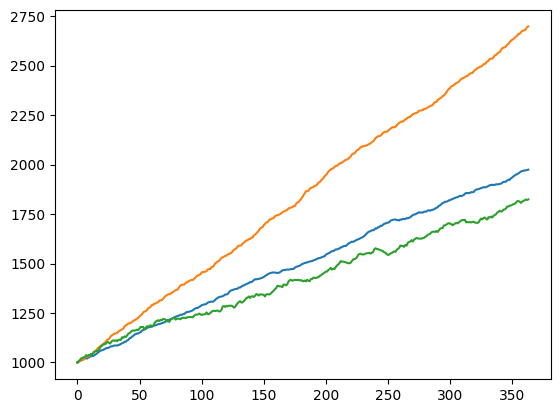

In [26]:
# generate_continuous(0, 2, 365, 1000, 2, 1)
generate_continuous(0, 2, 365, 1000, 2, exponent1.value)
generate_continuous(0, 2, 365, 1000, 2, 1, [[0.5, 0.5],[1, 0.5]])
# generate_continuous(0, 5, 365, 1000, 2, 1.0003)
generate_continuous(0, 5, 365, 1000, 2, exponent2.value)